In [1]:
import numpy as np 
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras_visualizer import visualizer
from keras import callbacks
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os

# load data

In [2]:
data_path = 'dataset/CK+48'
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-anger

Loaded the images of dataset-contempt

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise



(327, 48, 48, 3)

# adding labels

In [3]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:45]=0      #45
labels[46:63]=1     #18
labels[64:122]=2    #59
labels[123:147]=3   #25
labels[148:216]=4   #69
labels[217:244]=5   #28
labels[245:327]=6   #83

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

# dividing into training and testing

In [4]:
Y = np_utils.to_categorical(labels, num_classes)

# x,y = shuffle(img_data,Y, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.30, shuffle=True, random_state=42)
# x_test = X_test

print(Y.shape)
print(X_train.shape)
print(X_test.shape)

(327, 7)
(228, 48, 48, 3)
(99, 48, 48, 3)


# creating model

In [38]:
input_shape=(48,48,3)

model = Sequential()

model.add(Conv2D(6, (5, 5), input_shape=input_shape,activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.7))
model.add(Dense(7, activation = 'softmax'))

model.summary()

visualizer(model, format='png')

# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(48,48,3), activation = 'relu'))
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'),input_shape=(48,48,1))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(7, kernel_size=(1, 1), activation='relu'))
# model.add(Conv2D(7, kernel_size=(4, 4), activation='relu'))
# model.add(Flatten())
# model.add(Activation("softmax"))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 44, 44, 6)         456       
_________________________________________________________________
activation_5 (Activation)    (None, 44, 44, 6)         0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)        3520      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

# training the model

In [40]:
filename='model_train_new.csv'
filepath = os.path.join("./emotion_detector_models/model_v6_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
# callbacks = [checkpoint]


csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
# checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'MeanSquaredError'])

In [42]:
model_info = model.fit(X_train, y_train, batch_size=7, epochs=50, validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/50
33/33 [==============================] - 2s 26ms/step - loss: 2.3201 - accuracy: 0.1315 - mean_squared_error: 0.1385 - val_loss: 1.8789 - val_accuracy: 0.2323 - val_mean_squared_error: 0.1196
Epoch 2/50
33/33 [==============================] - 0s 15ms/step - loss: 1.8467 - accuracy: 0.2599 - mean_squared_error: 0.1182 - val_loss: 1.8034 - val_accuracy: 0.3434 - val_mean_squared_error: 0.1159
Epoch 3/50
33/33 [==============================] - 0s 15ms/step - loss: 1.7544 - accuracy: 0.3594 - mean_squared_error: 0.1126 - val_loss: 1.6409 - val_accuracy: 0.4040 - val_mean_squared_error: 0.1042
Epoch 4/50
33/33 [==============================] - 0s 13ms/step - loss: 1.6533 - accuracy: 0.4092 - mean_squared_error: 0.1047 - val_loss: 1.4606 - val_accuracy: 0.5455 - val_mean_squared_error: 0.0915
Epoch 5/50
33/33 [==============================] - 0s 14ms/step - loss: 1.5104 - accuracy: 0.4671 - mean_squared_error: 0.0959 - val_loss: 1.2573 - val_accuracy: 0.5960 - val_mean_squared

In [50]:
model.save('my_model.hdf5')

# predict model

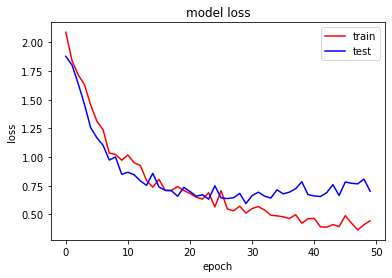

In [43]:
plt.plot(model_info.history['loss'], 'r', label='train')
plt.plot(model_info.history['val_loss'], 'b', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

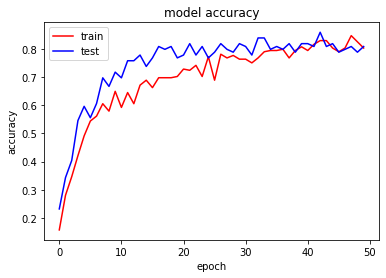

In [46]:
plt.plot(model_info.history['accuracy'], 'r', label='train')
plt.plot(model_info.history['val_accuracy'], 'b', label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [45]:
# evaluate the model
score = model.evaluate(X_train, y_train)
print('Accuracy (train): %.2f' % (score[1]*100))

score = model.evaluate(X_test, y_test)
print('Accuracy (test): %.2f' % (score[1]*100))

8/8 [==============================] - 0s 7ms/step - loss: 0.0676 - accuracy: 0.9956 - mean_squared_error: 0.0034
Accuracy (train): 99.56
4/4 [==============================] - 0s 6ms/step - loss: 0.7024 - accuracy: 0.8081 - mean_squared_error: 0.0416
Accuracy (test): 80.81


(1, 48, 48, 3)
[[1.16770685e-01 1.27239078e-02 4.82132845e-03 2.00797711e-02
  2.15600012e-04 4.72938359e-01 3.72450262e-01]]
[5]
[[0. 0. 0. 0. 0. 1. 0.]]


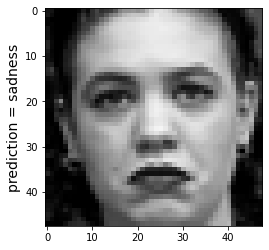

In [47]:
test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(np.argmax(model.predict(test_image), axis=-1))
print(y_test[0:1])

plt.imshow(test_image[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image), axis=-1)[0]), fontsize=14)
plt.show()

(1, 48, 48, 3)
[[0. 0. 0. 0. 0. 0. 1.]]
[6]
[[0. 0. 0. 0. 0. 1. 0.]]


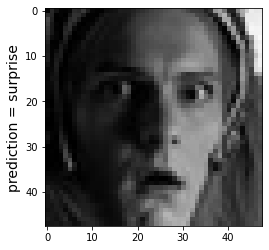

In [48]:
test_image = cv2.imread('test_images/surprise.jpg')
test_image_resize = cv2.resize(test_image,(48,48))
test_image_resize = np.reshape(test_image_resize, (1, 48, 48, 3))
print (test_image_resize.shape)

print(model.predict(test_image_resize))
print(np.argmax(model.predict(test_image_resize), axis=-1))
print(y_test[0:1])

plt.imshow(test_image_resize[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image_resize), axis=-1)[0]), fontsize=14)
plt.show()

(1, 48, 48, 3)
[[3.9864244e-11 9.2559987e-10 3.5925258e-09 3.9876071e-09 1.0000000e+00
  4.2149225e-11 8.9772426e-11]]
[4]
[[0. 0. 0. 0. 1. 0. 0.]]


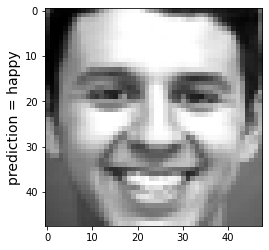

In [49]:
test_image = X_test[33:34]
print (test_image.shape)

print(model.predict(test_image))
print(np.argmax(model.predict(test_image), axis=-1))
print(y_test[33:34])

plt.imshow(test_image[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image), axis=-1)[0]), fontsize=14)
plt.show()